<center>
<img src="logo.png" height="900"> 
</center>


# Линейная регрессия 

Данные для этой домашки взяты из [книги по эконометрике Филиппа Картаева](https://www.econ.msu.ru/departments/mmae/Category.20190227154534_1269/Category.20190227155254_6724/)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats 

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Задание 1 (тренинг)

Руководство крупной торговой сети планирует выяснить, помогает ли тренинг по продажам увеличить эффективность работы менеджеров по продажам. 

Для решения этой задачи были собраны данные: 

- `sales` - объём продаж данного менеджера (в тысячах рублей за период)
- `training` - дамми-переменная, равная единице, если в а самом начале данного периода менеджер прошел тренинг по продажам (работники, которые направлялись на курсы, выбирались из общей совокупности работников компании при помощи специальной лотереи)
- `female` - дамми-переменная, равная единице для менеджеров женщин и нулю для мужчин
- `experience` - опыт работы менеджера в годах 
- `capital` -  дамми-переменная, равная единице, если менеджер работает в столичном отделении компании, и равная нулю в противном случае
- `IQ` - все менеджеры при приеме на работу проходят IQ-тест 

In [24]:
df = pd.read_csv('training.tsv', sep='\t')
print(df.shape)
df.head()

(2000, 6)


,sales,training,female,experience,capital,IQ
0,145.554,0,0,2,0,101
1,100.768,0,0,2,0,83
2,107.222,0,0,1,0,85
3,143.026,0,1,1,1,101
4,176.246,0,0,1,0,98


Предполагается, что в данных есть гетероскедастичность. Все гипотезы проверяйте с учётом коррекции `HC3`.

> Гетероскедастичность довольно часто присутствует в данных. Из-за этого, на практике, обычно, сразу вводят коррекцию на неё, и тестируют все гипотезы с помощью асимптотического подхода.

__[а]__ Оцените регрессию переменной `sales` на переменные `training`, `female`, `experience`, `capital`, `IQ`. Значимо ли уравнение в целом на уровне значимости 5%? Сколько переменных значимы на уровне значимости $5\%$? 

In [25]:
import statsmodels.formula.api as smf

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
model = smf.ols(formula='sales ~ training + female + experience + capital + IQ', data=df)
# your code here
res = model.fit(cov_type='HC3')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     180.0
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          2.27e-158
Time:                        07:55:30   Log-Likelihood:                -9998.1
No. Observations:                2000   AIC:                         2.001e+04
Df Residuals:                    1994   BIC:                         2.004e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.3731      6.720     -3.627      0.000     -37.544     -11.202
training      18.8678      1.821     10.362      0.000      15.299      22.437
female         0.3928      1.762      0.223      0.824      -3.060       3.846
experience     5.3006      0.571      9.289      0.000       4.182       6.419
capital        3.2957      1.612      2.045      0.041       0.137       6.455
IQ             1.7288      0.065     26.658      0.000       1.602       1.856
==============================================================================
Omnibus:                      130.665   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.149
Skew:                           0.577   Prob(JB):                     9.27e-39
Kurtosis:                       3.878   Cond. No.                         885.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

- Запишите в переменную `prob_f` $p$-value для гипотезы о незначимости регрессии. 
- В переменную `cnt` запишите число незначимых коэффициентов. 
- На сколько в среднем, при прочих равных условиях, прохождение тренинга увеличивыет объём продаж менеджера? Запишите ответ в переменную `tren`.

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

prob_f = res.f_pvalue
cnt = 1
tren = res.params['training']

# your code here


In [27]:
assert np.abs(prob_f - 7.03e-159) < 1e-4

# несколько похожих скрытых тестов

__[б]__ Оцените модель заново, исключив из неё переменную `capital` и добавив переменную `training:capital` (произведение столбцов). Значим ли коэффициент перед этой переменной на уровне значимости $5\%$? 

In [28]:
df['training_capital'] = df['training'] * df['capital']

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

model = smf.ols(formula='sales ~ training + female + experience + training_capital + IQ', data=df)
# your code here
res = model.fit(cov_type='HC3')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     180.6
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          7.24e-159
Time:                        07:55:43   Log-Likelihood:                -9997.7
No. Observations:                2000   AIC:                         2.001e+04
Df Residuals:                    1994   BIC:                         2.004e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -22.3146      6.693     -3.334      0.001     -35.432      -9.198
training            15.6526      2.473      6.330      0.000      10.806      20.499
female               0.3390      1.761      0.193      0.847      -3.113       3.791
experience           5.3176      0.570      9.330      0.000       4.201       6.435
training_capital     6.4438      3.135      2.055      0.040       0.299      12.589
IQ                   1.7236      0.065     26.572      0.000       1.596       1.851
==============================================================================
Omnibus:                      130.771   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.278
Skew:                           0.577   Prob(JB):                     8.69e-39
Kurtosis:                       3.878   Cond. No.                         881.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

- На сколько в среднем,  при прочих равных условиях, увеличивыет объём продаж столичного менеджера? Запишите ответ в переменную `ans1`.
- На сколько в среднем,  при прочих равных условиях, увеличивыет объём продаж менеджера не из столицы? Запишите ответ в переменную `ans2`.

In [30]:
ans1 = res.params['training_capital']
ans2 = res.params['training']

# your code here


In [31]:
assert np.abs(ans2 - 15.7) < 1e-1

# несколько похожих скрытых тестов

__[в]__ Для модели, оценённой в пункте б) проведите тест Бреуша-Пагана на гетероскедастичность. Действительно ли она наблюдается ли она в остатках? 

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from statsmodels.stats.diagnostic import het_breuschpagan

# your code here
het_breuschpagan(res.resid, df[['training', 'female', 'experience', 'training_capital', 'IQ']])

(546.148541735535,
 6.969783368672127e-117,
 149.88688625219822,
 2.3335727940784415e-135)

## Задание 2 (размер класса) 

Давайте попробуем проанализировать данные о том, как размер класса влияет на успеваемость учеников. Коррекцию HC3 в этом задании мы использовать не будем. 

__Описание переменных:__

- `CLASS` - размер класса, в котором обучается школьник, воздействие именно этой переменной нас интересует 
- `EXPN` - средние расходы на одного школьника в школе, где он учится, измеренные в тысячах долларов в год
- `INCOME` - средний доход на одного члена семьи в семие школьника, измеренный в тысячах долларов в год 
- `TEST` - результат итогового стандартизированного теста, который писали все школьники в конце учебного года, она характеризует качество обучения 

In [32]:
df = pd.read_csv('study.tsv', sep='\t')
print(df.shape)
df.head()

(200, 4)


,CLASS,EXPN,INCOME,TEST
0,23,3,10,15
1,28,3,46,44
2,12,5,39,76
3,18,2,22,7
4,30,5,20,30


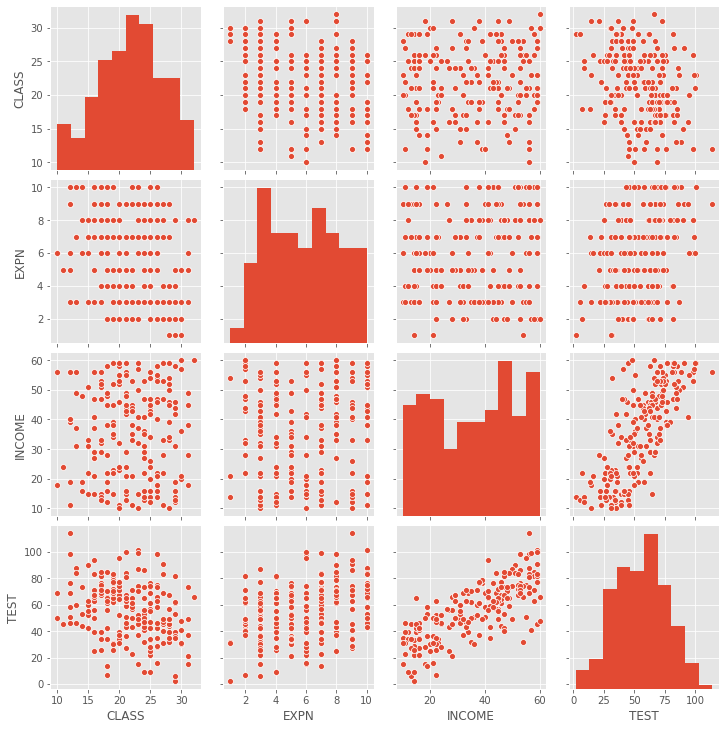

In [33]:
sns.pairplot(df);

__[a]__ Оцените параметры модели 

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \varepsilon_i
$$

Коррекцию на гетероскедастичность вводить не надо. 

In [39]:
def my_ols(data, cols, target, alpha=0.05):
    summary = pd.DataFrame({})
    
    x = data[cols].values.reshape(-1, len(cols))
    y = data[target].values.reshape(-1, 1)
    
    n_obs = len(x)
    n_params = len(cols)
    df = n_obs - n_params -1

    x = np.hstack((np.ones((len(x), 1)), x))
    w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)  # (X.T*X)^-1*X.T*Y

    RSS = np.sum((y - x.dot(w))**2)  # Residual sum of squares
    
    se_coef = np.sqrt((RSS / (df)) * np.linalg.inv(x.T.dot(x)).diagonal())  # Standard error for coefs
    t = w.ravel() / se_coef
    
    cdf_t = stats.t(df=df).cdf(t)
    
    pvals = []
    for cdf in cdf_t:
        if cdf >= 0.5:
            pval = 2 * (1 - cdf)
        else:
            pval = 2 * cdf
        pvals.append(pval)
    
    summary['coef'] = w.ravel()
    summary['se_coef'] = se_coef
    summary['t'] = t
    summary['pvals'] = pvals
    summary[f'[{alpha/2}'] = w.ravel() - se_coef*stats.t(df=df).ppf(1-alpha/2)
    summary[f'{1-alpha/2}]'] = w.ravel() + se_coef*stats.t(df=df).ppf(1-alpha/2)
    summary['df'] = df
    
    summary.index = ['Intercept'] + cols
    return summary

In [40]:
my_ols(df, ['CLASS'], 'TEST')

,coef,se_coef,t,pvals,[0.025,0.975],df
Intercept,83.655370,6.278549,13.323997,0.000000,71.273961,96.036779,198
CLASS,-1.309212,0.280996,-4.659184,0.000006,-1.863342,-0.755083,198


In [36]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
model = smf.ols(formula='TEST ~ CLASS', data=df)
# your code here
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEST   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.71
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           5.82e-06
Time:                        07:57:42   Log-Likelihood:                -885.26
No. Observations:                 200   AIC:                             1775.
Df Residuals:                     198   BIC:                             1781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.6554      6.279     13.324      0.000      71.274      96.037
CLASS         -1.3092      0.281     -4.659      0.000      -1.863      -0.755
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.750
Skew:                          -0.024   Prob(JB):                        0.687
Kurtosis:                       2.704   Cond. No.                         97.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значима ли переменная `CLASS`? В качестве ответ на вопрос вбейте получившееся значение $p$-value и получившееся значение коэффициента.

In [16]:
prob = 0
beta = res.params['CLASS']

# your code here


In [17]:
assert prob < 1e-10

# несколько похожих скрытых тестов

В получившемся уравнении коэффициент $\beta_1$ можно проинтерпретировать так, что  каждый дополнительным человек в классе приводит к тому, что результат типичного школьника из этого класса снижается в среднем на $beta_1$ балла.

> Мы можем так интерпретировать значение коэффициента, если выполняются предпослыки линейной регрессии. Например, первая предпослыка говорит о том, что мы должны были верно специфицировать модель. А что, если это не так и мы пропустили какую-нибудь переменную?

__[б]__ Оцените уравнение 

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \beta_2 \cdot EXPN_i + \varepsilon_i
$$

In [18]:
my_ols(df, ['CLASS', 'EXPN'], 'TEST')

,coef,se_coef,t,pvals,[0.025,0.975]
Intercept,60.155964,7.971166,7.546696,1.615375e-12,44.436195,75.875734
CLASS,-0.908844,0.282915,-3.212427,1.537532e-03,-1.466775,-0.350913
EXPN,2.537118,0.566948,4.475049,1.290608e-05,1.419053,3.655183


In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
model = smf.ols(formula='TEST~CLASS+EXPN', data=df)
# your code here
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEST   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     21.91
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.56e-09
Time:                        07:53:22   Log-Likelihood:                -875.58
No. Observations:                 200   AIC:                             1757.
Df Residuals:                     197   BIC:                             1767.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.1560      7.971      7.547      0.000      44.436      75.876
CLASS         -0.9088      0.283     -3.212      0.002      -1.467      -0.351
EXPN           2.5371      0.567      4.475      0.000       1.419       3.655
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.108
Skew:                          -0.096   Prob(JB):                        0.349
Kurtosis:                       2.535   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Значимо ли уравнение в целом?  Запишите получившееся значение $F$-статистики для проверки этой гипотезы в переменную `f_stat`

In [20]:
f_stat = res.fvalue

# your code here


In [21]:
assert f_stat > 8

# несколько похожих скрытых тестов

Коэффициент перед переменной `CLASS` значимый, но он увеличился. По всей видимости, переменная `EXPN`, которую мы добавили, значимо влияет на результаты школьника. Кроме того, она коррелирует с `CLASS`. Когда мы не включаем её в модель, влияние этой переменной остаётся в случайной ошибке. Из-за этого возникает ковариация $Cov(CLASS_i, \varepsilon_i)$. 

Такая проблема называется __эндогенностью.__ Она приводит к смещению и несостоятельности оценок коэффициентов. Когда мы добавили в модель переменную `EXPN`, мы устранили возникшее у нас смещение. 

__[в]__ А что, если у нас есть какие-то другие переменные, которые оказались в ошибке, но при этом коррелируют с `CLASS`? Оцените уравнение:

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \beta_2 \cdot EXPN_i + \beta_3 \cdot INCOME + \varepsilon_i
$$

In [22]:
my_ols(df, ['CLASS', 'EXPN', 'INCOME'], 'TEST')

,coef,se_coef,t,pvals,[0.025,0.975]
Intercept,29.178617,4.847205,6.019679,8.460552e-09,19.619245,38.737989
CLASS,-1.072502,0.163173,-6.572811,4.361339e-10,-1.394302,-0.750703
EXPN,2.050219,0.327487,6.260459,2.373830e-09,1.404368,2.696070
INCOME,1.048991,0.052599,19.943008,0.000000e+00,0.945257,1.152724


In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
model = smf.ols(formula='TEST~CLASS+EXPN+INCOME', data=df)
# your code here
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEST   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     176.6
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.84e-55
Time:                        07:53:22   Log-Likelihood:                -764.75
No. Observations:                 200   AIC:                             1537.
Df Residuals:                     196   BIC:                             1551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1786      4.847      6.020      0.000      19.619      38.738
CLASS         -1.0725      0.163     -6.573      0.000      -1.394      -0.751
EXPN           2.0502      0.327      6.260      0.000       1.404       2.696
INCOME         1.0490      0.053     19.943      0.000       0.945       1.153
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.502
Skew:                          -0.257   Prob(JB):                        0.286
Kurtosis:                       2.811   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Обратите внимание, что значение перед переменной `CLASS` снова изменилось.

Изначально нас волновал вопрос: __Влияет ли размер класса на успеваемость?__ По факту, нас интересует только коэффициент перед этой переменной. Чтобы получить для него хорошую оценку, нам нужно учитывать в нашей регрессии все существенные факторы (т.е. все коррелированные с интересущей нас переменной факторы, коэффициенты при которых в истинной модели регрессии отличны от нуля). Такие дополнительные переменные обычно называют __контрольными__. 

Иногда бывает так, что интересующая нас переменная связана с чем-то ненаблюдаемым. Например, в данной ситуации успешность людей может быть связана с их талантом. Если мы никак не учтем талант людей в модели, мы получим неверные выводы. В эконометрике существуют различные продвинутые методы, которые позволяют попытаться оценить модели, учитывающие такие факторы. 

Узнать о них подробнее можно в [курсе по Экнонометрике,](https://www.coursera.org/learn/ekonometrika) В качестве учебника можно почитать, например, книгу "Введение в эконометрику" Филиппа Картаева. :)  